In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import random
from collections import Counter

# Set plot style for better visualization
plt.style.use('ggplot')

In [4]:
# Define paths to Training and Testing folders
train_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'
test_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/'

# Get list of class folders
train_classes = os.listdir(train_path)
test_classes = os.listdir(test_path)

print("Training classes:", train_classes)
print("Testing classes:", test_classes)

# Count images per class in Training set
train_image_counts = {}
for class_name in train_classes:
    class_path = os.path.join(train_path, class_name)
    train_image_counts[class_name] = len(os.listdir(class_path))

# Count images per class in Testing set
test_image_counts = {}
for class_name in test_classes:
    class_path = os.path.join(test_path, class_name)
    test_image_counts[class_name] = len(os.listdir(class_path))

print("\nTraining image counts:", train_image_counts)
print("Testing image counts:", test_image_counts)

Training classes: ['pituitary', 'notumor', 'meningioma', 'glioma']
Testing classes: ['pituitary', 'notumor', 'meningioma', 'glioma']

Training image counts: {'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}
Testing image counts: {'pituitary': 300, 'notumor': 405, 'meningioma': 306, 'glioma': 300}


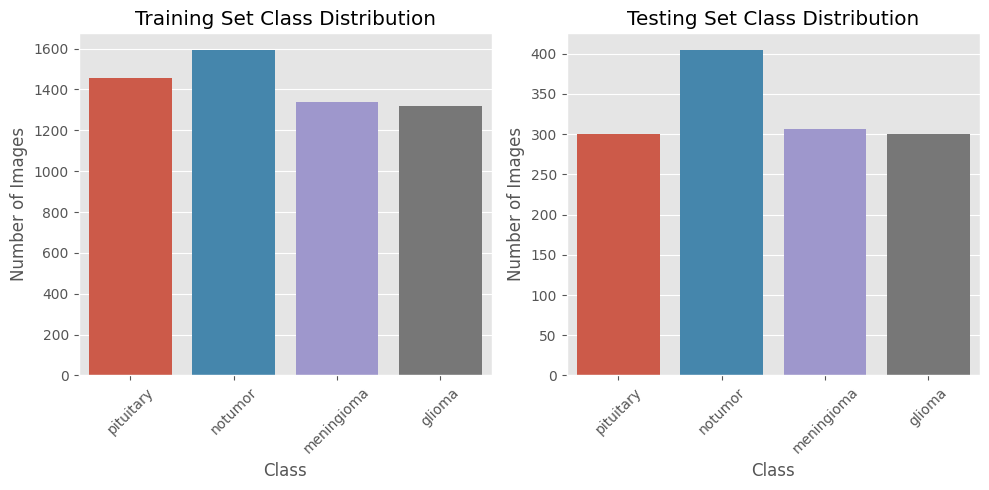

In [10]:
# Create DataFrames for class counts to ensure compatibility with seaborn
train_df = pd.DataFrame(list(train_image_counts.items()), columns=['Class', 'Count'])
test_df = pd.DataFrame(list(test_image_counts.items()), columns=['Class', 'Count'])

# Plot class distribution for Training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=train_df, x='Class', y='Count')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Plot class distribution for Testing set
plt.subplot(1, 2, 2)
sns.barplot(data=test_df, x='Class', y='Count')
plt.title('Testing Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

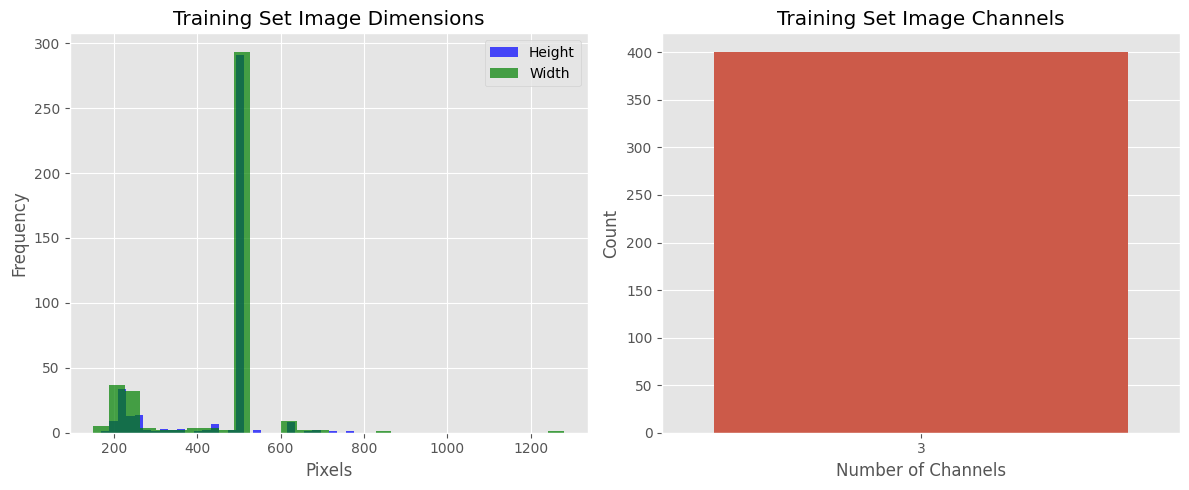

In [11]:
# Function to get image properties
def get_image_properties(folder_path, num_samples=100):
    dimensions = []
    channels = []
    
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_path)
        # Sample a subset of images to speed up analysis
        sampled_files = random.sample(image_files, min(num_samples, len(image_files)))
        
        for img_name in sampled_files:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                dimensions.append(img.shape[:2])  # Height, Width
                channels.append(img.shape[2] if len(img.shape) == 3 else 1)
    
    return dimensions, channels

# Get properties for Training set
train_dims, train_channels = get_image_properties(train_path)
train_heights, train_widths = zip(*train_dims)  # Unzip dimensions

# Create DataFrame for channels to avoid seaborn warning
channels_df = pd.DataFrame({'Channels': train_channels})

# Plot image dimensions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_heights, bins=30, color='blue', alpha=0.7, label='Height')
plt.hist(train_widths, bins=30, color='green', alpha=0.7, label='Width')
plt.title('Training Set Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()

# Plot channel distribution
plt.subplot(1, 2, 2)
sns.countplot(data=channels_df, x='Channels')
plt.title('Training Set Image Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

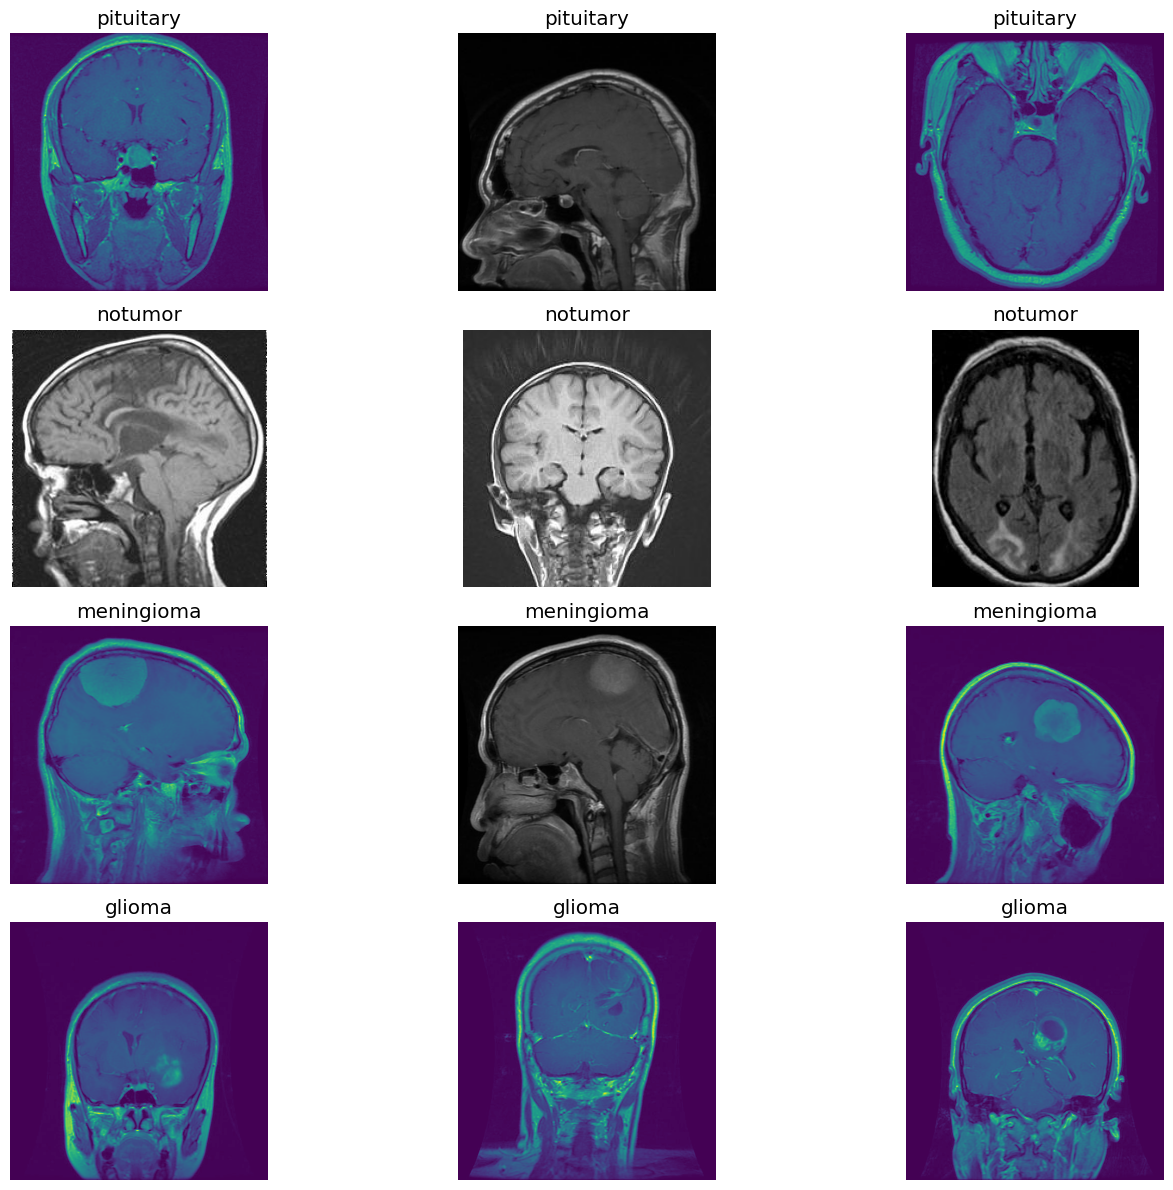

In [7]:
# Function to display sample images from each class
def display_sample_images(folder_path, classes, num_samples=3):
    plt.figure(figsize=(15, len(classes) * 3))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_path)
        sampled_images = random.sample(image_files, min(num_samples, len(image_files)))
        
        for j, img_name in enumerate(sampled_images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images from Training set
display_sample_images(train_path, train_classes)

In [8]:
# Function to check for missing or corrupted images
def check_corrupted_images(folder_path):
    corrupted = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None:
                    corrupted.append(img_path)
            except:
                corrupted.append(img_path)
    return corrupted

# Check Training and Testing sets
train_corrupted = check_corrupted_images(train_path)
test_corrupted = check_corrupted_images(test_path)

print("Corrupted images in Training set:", train_corrupted)
print("Corrupted images in Testing set:", test_corrupted)

Corrupted images in Training set: []
Corrupted images in Testing set: []


In [9]:
# Summarize key findings
total_train_images = sum(train_image_counts.values())
total_test_images = sum(test_image_counts.values())

print("EDA Summary:")
print(f"Total Training images: {total_train_images}")
print(f"Total Testing images: {total_test_images}")
print(f"Classes: {train_classes}")
print(f"Class imbalance: {train_image_counts}")
print(f"Image dimensions (sample): {set(train_dims)}")
print(f"Image channels (sample): {set(train_channels)}")
print(f"Corrupted images: {len(train_corrupted) + len(test_corrupted)}")

EDA Summary:
Total Training images: 5712
Total Testing images: 1311
Classes: ['pituitary', 'notumor', 'meningioma', 'glioma']
Class imbalance: {'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}
Image dimensions (sample): {(417, 428), (630, 630), (168, 300), (350, 350), (234, 215), (583, 1000), (537, 472), (320, 257), (526, 530), (423, 630), (449, 359), (674, 648), (442, 442), (600, 494), (357, 236), (340, 339), (282, 230), (519, 600), (848, 785), (300, 236), (400, 393), (236, 236), (412, 300), (512, 512), (506, 444), (326, 276), (244, 206), (320, 296), (262, 227), (212, 238), (236, 211), (250, 201), (286, 224), (424, 417), (256, 256), (243, 207), (442, 441), (336, 264), (393, 350), (284, 324), (341, 315), (221, 228), (192, 192), (242, 208), (377, 341), (257, 196), (198, 150), (218, 180), (213, 227), (213, 236), (253, 278), (225, 207), (1024, 1024), (226, 236), (851, 724), (512, 416), (225, 225), (243, 203), (277, 235), (201, 173), (248, 257), (496, 453), (251, 201